# Lab 3

## Exercício 1

### 1)

In [144]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

#### a)

In [145]:
def gerar_padrao_aleatorio(n_bits):
    return [random.randint(0, 1) for _ in range(n_bits)]
print(gerar_padrao_aleatorio(8))

[0, 0, 1, 0, 0, 0, 0, 0]


#### b)

In [146]:
def random_search(target):
    n_bits = len(target)
    start = time.time()
    attempts = 0
    while True:
        guess = gerar_padrao_aleatorio(n_bits)
        attempts += 1
        if guess == target:
            break
    tempo_total = time.time() - start
    return attempts, tempo_total

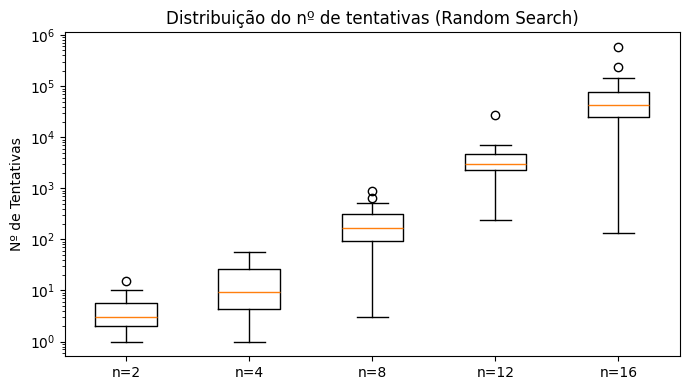

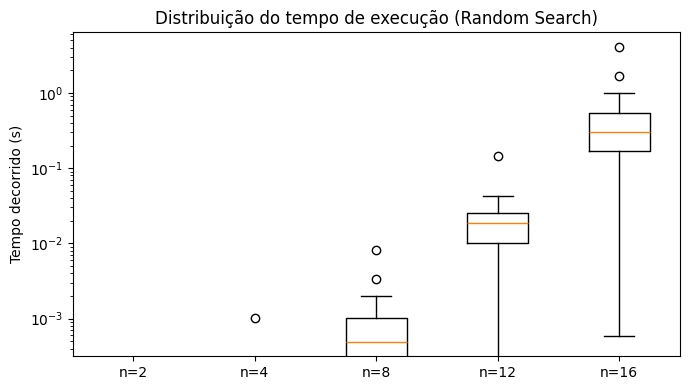

In [147]:
import numpy as np
import matplotlib.pyplot as plt

n_bits = [2, 4, 8, 12, 16]
attempts = {n: [] for n in n_bits}
elapsed = {n: [] for n in n_bits}

for n in n_bits:
    for _ in range(30):
        att, el = random_search(gerar_padrao_aleatorio(n))
        attempts[n].append(att)
        elapsed[n].append(el)

data = [attempts[n] for n in n_bits]
plt.figure(figsize=(7,4))
box = plt.boxplot(data, tick_labels=[f'n={n}' for n in n_bits])

plt.yscale('log')
plt.ylabel('Nº de Tentativas')
plt.title('Distribuição do nº de tentativas (Random Search)')
plt.tight_layout()
plt.show()

data = [elapsed[n] for n in n_bits]
plt.figure(figsize=(7,4))
box = plt.boxplot(data, tick_labels=[f'n={n}' for n in n_bits])

plt.yscale('log')
plt.ylabel('Tempo decorrido (s)')
plt.title('Distribuição do tempo de execução (Random Search)')
plt.tight_layout()
plt.show()

#### c)

In [148]:
def fitness(guess, target):
    return sum(1 for g, t in zip(guess, target) if g == t)/len(target)

#### d)

In [149]:
def mutar(padrao):
    novo = padrao.copy()
    i = random.randrange(0,len(padrao))
    novo[i] = (novo[i] + 1) % 2
    return novo

print(mutar([0, 1, 0, 1, 1, 0, 0, 1]))

[0, 1, 0, 1, 1, 0, 1, 1]


In [150]:
def sucessive_mutations(target, max_mutations=1000):
    inicio = time.time()
    atual = gerar_padrao_aleatorio(len(target))
    fitness_atual = fitness(atual, target)
    historico = [fitness_atual]

    for _ in range(max_mutations):
        candidato = mutar(atual)
        fitness_candidato = fitness(candidato, target)

        if fitness_candidato > fitness_atual:
            atual = candidato
            fitness_atual = fitness_candidato

        historico.append(fitness_atual)

        if fitness_atual == len(target):
            break  # Atingiu o padrão correto

    tempo_total = time.time() - inicio
    return atual, fitness_atual, tempo_total, historico

Objetivo:      [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Solução final: [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Fitness final: 1.0
Tempo de execução: 0.0 segundos


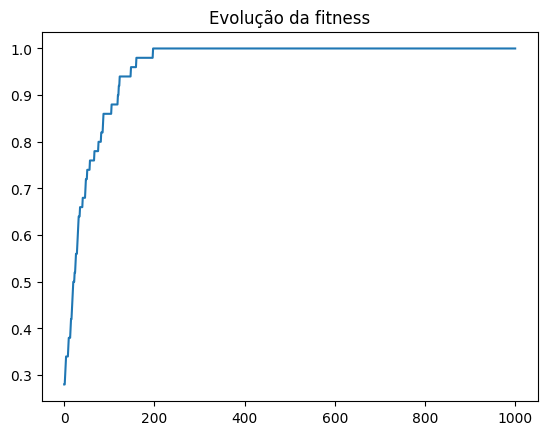

In [151]:
target = gerar_padrao_aleatorio(50)
print("Objetivo:     ", target)
resultado, fit, tempo, hist = sucessive_mutations(target)
print("Solução final:", resultado)
print("Fitness final:", fit)
print("Tempo de execução:", tempo, "segundos")
plt.plot(hist)
plt.title("Evolução da fitness")
plt.show()

Observação: Com a introdução da função de fitness e da mutação orientada, o tempo de execução reduziu-se drasticamente face à procura aleatória. Enquanto a primeira abordagem dependia apenas da sorte, esta nova solução utiliza informação sobre a qualidade(fitness) das tentativas permitindo convergir para a solução, alcançando o padrão correto de forma muito mais rápida e eficiente.
Variando o tamanho do target analisamos que deixamos de conseguir chegar à soluçao quando o tamanho supera os 200 bits, isso resolveria-se retirando a restriçao do numero maximo de 1000 mutações.
Optamos ainda por normalizar a fitness uma vez que permite comparar de maneira mais justa resultado com tamanhos de padrão diferente.

### 2)

In [152]:
def gerar_populacao(n_individuos, n_bits):
    return [gerar_padrao_aleatorio(n_bits) for _ in range(n_individuos)]

def melhorarPopulacao(target, tamanho_pop=100, frac_melhores=0.3, max_geracoes=1000, limite_estagnacao=100):
    n_bits = len(target)

    populacao = gerar_populacao(tamanho_pop, n_bits)

    melhor_fitness = 0
    sem_melhora = 0
    historico = []

    inicio = time.time()
    for _ in range(max_geracoes):

        # Avaliar fitness de cada indivíduo
        fitnesses = []
        for padrao in populacao:
            fitnesses.append(fitness(padrao, target))

        # Juntar indivíduos e fitness numa lista
        pares = list(zip(populacao, fitnesses))

        # Ordenar manualmente por fitness (maior primeiro)
        pares.sort(reverse=True, key=lambda x: x[1])

        # Selecionar os melhores (30%)
        n_melhores = int(tamanho_pop * frac_melhores)
        melhores_padroes = [pares[i][0] for i in range(n_melhores)]
        melhor_fit_atual = pares[0][1]

        historico.append(melhor_fit_atual)

        if melhor_fit_atual > melhor_fitness: # Para evitar a estagnação
            melhor_fitness = melhor_fit_atual
            sem_melhora = 0
        else:
            sem_melhora += 1

        # Condições de paragem
        if melhor_fitness == 1 or sem_melhora >= limite_estagnacao:
            break

        # Criar nova população: 30% melhores + 70% mutados
        nova_pop = melhores_padroes.copy()
        while len(nova_pop) < tamanho_pop:
            x = random.choice(melhores_padroes)
            filho = mutar(x)
            nova_pop.append(filho)

        populacao = nova_pop

    tempo_total = time.time() - inicio
    return melhor_fitness, tempo_total, historico

Melhor fitness encontrado: 0.999
Tempo de execução: 6.000391244888306 segundos


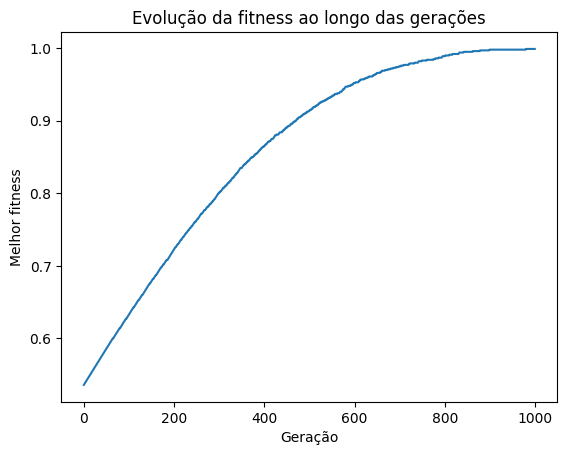

In [153]:
target = gerar_padrao_aleatorio(1000)

melhor, tempo, hist = melhorarPopulacao(target)

print("Melhor fitness encontrado:", melhor)
print("Tempo de execução:", tempo, "segundos")

plt.plot(hist)
plt.xlabel("Geração")
plt.ylabel("Melhor fitness")
plt.title("Evolução da fitness ao longo das gerações")
plt.show()

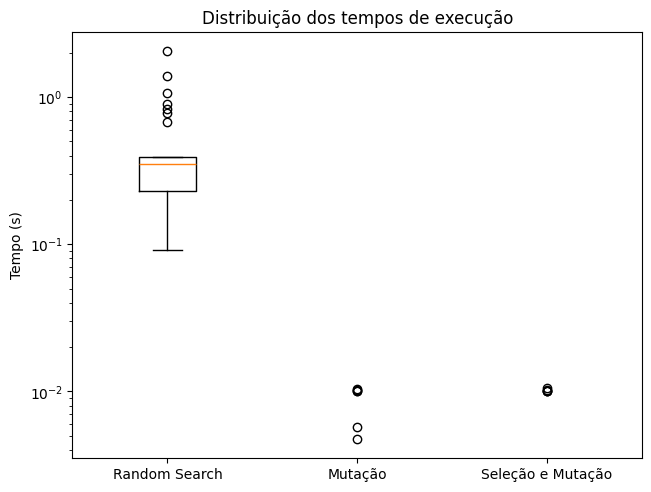

In [154]:
metodo = ["Random Search", "Mutação", "Seleção e Mutação"]
resultados = {m: [] for m in metodo}

for i in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo = random_search(target)
    resultados["Random Search"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, _, tempo, _ = sucessive_mutations(target)
    resultados["Mutação"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo, _ = melhorarPopulacao(target)
    resultados["Seleção e Mutação"].append(tempo)

data = [resultados[m] for m in metodo]
plt.boxplot(data, tick_labels=[f'{m}' for m in metodo])
plt.tight_layout()
plt.ylabel("Tempo (s)")
plt.title("Distribuição dos tempos de execução")
plt.yscale('log')
plt.show()

### 3)

In [155]:
def cruzar(pai, mae):
    i = random.randrange(0,len(pai))
    filho1 = pai[:i] + mae[i:]
    filho2 = mae[:i] + pai[i:]
    return filho1, filho2

In [156]:
def cruzarPopulacao(target, tamanho_pop=100, frac_melhores=0.3, max_geracoes=1000, limite_estagnacao=100):
    n_bits = len(target)

    populacao = gerar_populacao(tamanho_pop, n_bits)

    melhor_fitness = 0
    sem_melhora = 0
    historico = []

    inicio = time.time()
    for _ in range(max_geracoes):

        # Avaliar fitness de cada indivíduo
        fitnesses = []
        for padrao in populacao:
            fitnesses.append(fitness(padrao, target))

        # Juntar indivíduos e fitness numa lista
        pares = list(zip(populacao, fitnesses))

        # Ordenar manualmente por fitness (maior primeiro)
        pares.sort(reverse=True, key=lambda x: x[1])

        # Selecionar os melhores (30%)
        n_melhores = int(tamanho_pop * frac_melhores)
        melhores_padroes = [pares[i][0] for i in range(n_melhores)]
        melhor_fit_atual = pares[0][1]

        historico.append(melhor_fit_atual)

        if melhor_fit_atual > melhor_fitness: # Para evitar a estagnação
            melhor_fitness = melhor_fit_atual
            sem_melhora = 0
        else:
            sem_melhora += 1

        # Condições de paragem
        if melhor_fitness == 1 or sem_melhora >= limite_estagnacao:
            break

        # Criar nova população: 30% melhores + 70% cruzados
        nova_pop = melhores_padroes.copy()
        while len(nova_pop) < tamanho_pop:
            x = random.choice(melhores_padroes)
            y = random.choice(melhores_padroes)
            filho1, filho2 = cruzar(x,y)
            nova_pop.append(filho1)
            nova_pop.append(filho2)

        populacao = nova_pop

    tempo_total = time.time() - inicio
    return melhor_fitness, tempo_total, historico

Melhor fitness encontrado: 0.94
Tempo de execução: 0.06024670600891113 segundos


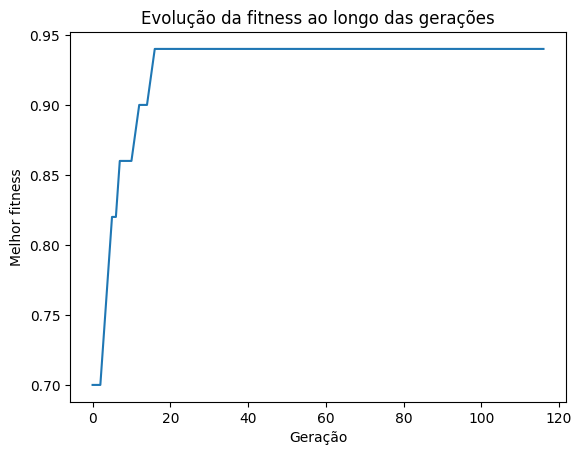

In [157]:
target = gerar_padrao_aleatorio(50)

melhor, tempo, hist = cruzarPopulacao(target)

print("Melhor fitness encontrado:", melhor)
print("Tempo de execução:", tempo, "segundos")

plt.plot(hist)
plt.xlabel("Geração")
plt.ylabel("Melhor fitness")
plt.title("Evolução da fitness ao longo das gerações")
plt.show()

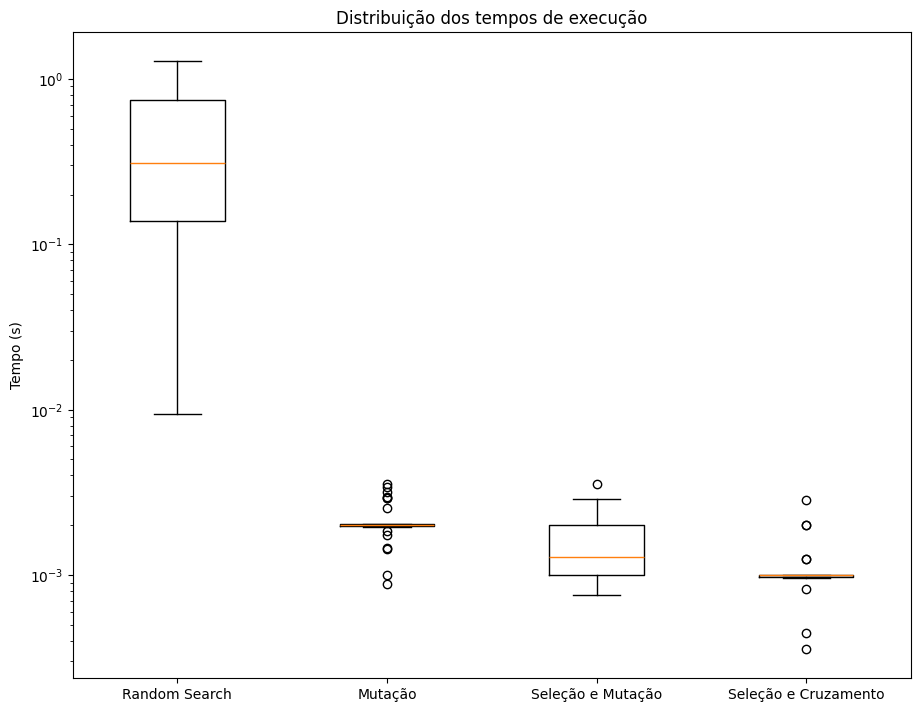

In [158]:
metodo = ["Random Search", "Mutação", "Seleção e Mutação", "Seleção e Cruzamento"]
resultados = {m: [] for m in metodo}

for i in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo = random_search(target)
    resultados["Random Search"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, _, tempo, _ = sucessive_mutations(target)
    resultados["Mutação"].append(tempo)

for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo, _ = melhorarPopulacao(target)
    resultados["Seleção e Mutação"].append(tempo)
    
for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    _, tempo, _ = cruzarPopulacao(target)
    resultados["Seleção e Cruzamento"].append(tempo)

data = [resultados[m] for m in metodo]
plt.figure(figsize=(9,7))
plt.boxplot(data, tick_labels=[f'{m}' for m in metodo])
plt.tight_layout()
plt.ylabel("Tempo (s)")
plt.title("Distribuição dos tempos de execução")
plt.yscale('log')
plt.show()

## Exercício 2

In [159]:
def fitness_variavel(guess, target):
    minimo = min(len(guess), len(target))
    pontos = 0
    for i in range(minimo):
        if guess[i] == target[i]:
            pontos += 1
    # penaliza diferença de tamanhos
    penalizacao = abs(len(guess) - len(target))
    return (pontos - penalizacao) / len(target)

# Mutação que pode inverter, adicionar ou remover bits
def mutar_variavel(padrao):
    novo = padrao.copy()
    acao = random.choice(["inverter", "adicionar", "remover"])

    if acao == "inverter" and len(novo) > 0:
        i = random.randint(0, len(novo) - 1)
        novo[i] = (novo[i] + 1) % 2
    elif acao == "adicionar" and len(novo) < 32:
        novo.append(random.randint(0, 1))
    elif acao == "remover" and len(novo) > 2:
        i = random.randint(0, len(novo) - 1)
        del novo[i]
    return novo

# Cruzamento adaptado a pais de tamanhos diferentes
def cruzar_variavel(pai, mae, target):
    pai_fit = fitness_variavel(pai, target)
    mae_fit = fitness_variavel(mae, target)
    if pai_fit >= mae_fit:
        melhor, pior = pai, mae
    else:
        melhor, pior = mae, pai
    n = len(melhor)
    ponto = random.randint(1, n - 1)
    filho1, filho2 = [0] * n, [0] * n
    for i in range(n):
        if i < ponto:
            filho1[i] = melhor[i]
            if i < len(pior):
                filho2[i] = pior[i]
        else:
            if i < len(pior):
                filho1[i] = pior[i]
            filho2[i] = melhor[i]
    return filho1, filho2

# def cruzar_variavel(pai, mae):
#     n = min(len(pai), len(mae))
#     if n < 2:
#         return pai, mae
#     ponto = random.randint(1, n - 1)
#     filho1 = pai[:ponto] + mae[ponto:]
#     filho2 = mae[:ponto] + pai[ponto:]
#     return filho1, filho2

Tamanho do alvo: 9 bits
Melhor fitness: 1.0
Tempo total: 0.006 segundos


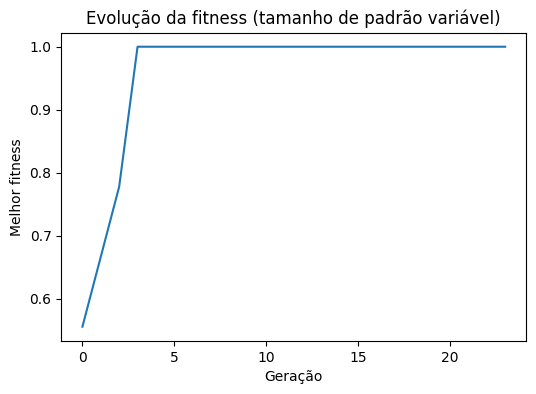

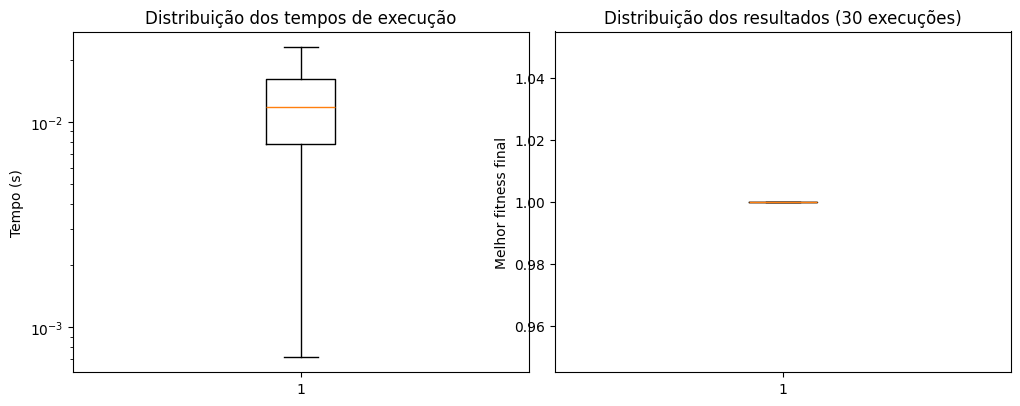

In [166]:
def evolucao_tamanho_variavel(limite_estagnacao=20, tamanho_pop=100, frac_melhores=0.3):
    # Gerar target com tamanho aleatorio
    n_bits = random.randint(2, 32)
    target = gerar_padrao_aleatorio(n_bits)

    populacao = [gerar_padrao_aleatorio(random.randint(2, 32)) for _ in range(tamanho_pop)]
    melhor_fitness = 0
    sem_melhora = 0
    historico = []

    inicio = time.time()
    while sem_melhora < limite_estagnacao:
        # Avaliar fitness
        fitnesses = [fitness_variavel(ind, target) for ind in populacao]
        pares = list(zip(populacao, fitnesses))
        pares.sort(reverse=True, key=lambda x: x[1])

        n_melhores = int(tamanho_pop * frac_melhores)
        melhores = [pares[i][0] for i in range(n_melhores)]
        melhor_atual = pares[0][1]
        historico.append(melhor_atual)

        if melhor_atual > melhor_fitness:
            melhor_fitness = melhor_atual
            sem_melhora = 0
        else:
            sem_melhora += 1

        # Criar nova geração 
        nova_pop = melhores.copy()
        while len(nova_pop) < tamanho_pop:
            pai = random.choice(melhores)
            mae = random.choice(melhores)
            filho1, filho2 = cruzar_variavel(pai, mae, target)
            
            filho1 = mutar_variavel(filho1)
            filho2 = mutar_variavel(filho2)
            nova_pop.append(filho1)
            if len(nova_pop) < tamanho_pop:
                nova_pop.append(filho2)

        populacao = nova_pop

    tempo_total = time.time() - inicio
    return target, melhor_fitness, tempo_total, historico



target, melhor, tempo, hist = evolucao_tamanho_variavel()

print(f"Tamanho do alvo: {len(target)} bits")
print("Melhor fitness:", melhor)
print("Tempo total:", round(tempo, 3), "segundos")

plt.figure(figsize=(6,4))
plt.plot(hist)
plt.xlabel("Geração")
plt.ylabel("Melhor fitness")
plt.title("Evolução da fitness (tamanho de padrão variável)")
plt.show()

# Testar 30 vezes
tempos = []
fitnesses = []

for _ in range(30):
    _, melhor, tempo, _ = evolucao_tamanho_variavel()
    tempos.append(tempo)
    fitnesses.append(melhor)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.tight_layout()
plt.boxplot(tempos)
plt.ylabel("Tempo (s)")
plt.title("Distribuição dos tempos de execução")
plt.yscale('log')

plt.subplot(1,2,2)
plt.boxplot(fitnesses)


plt.ylabel("Melhor fitness final")
plt.title("Distribuição dos resultados (30 execuções)")

plt.show()

## Exercício 3
Na função de avaliação (fitting), em vez de somar 1 para cada posição igual no padrão de teste e no padrão objetivo, podiamos somar o módulo da diferença entre o valor do padrão de teste e do padrão objetivo, sendo que neste caso, quanto menor o valor devolvido pela função de avaliação, melhor, sendo que para o valor 0, ambos os padrões são iguais.

Na função de mutação, agora será somado um valor decimal aletório entre -1 e +1 a um dos valores do padrão.

Na função de cruzamento, não é necessária qualquer alteração, pois o método atualmente utilizado não tem em conta o tipo de informação presente nos padrões.